In [12]:
import re

with open("kaijin_nijumenso.txt", mode="r", encoding="utf-8") as f:
    text_original = f.read()
    

text = re.sub("《[^》]+》", "", text_original) # ルビの削除
text = re.sub("［[^］]+］", "", text) # 読みの注意の削除
text = re.sub("[｜ 　]", "", text) # | と全角半角スペースの削除
print("文字数", len(text))  # len() で文字列の文字数も取得可能

文字数 110323


In [13]:
n_rnn = 10
batch_size = 128
epochs = 20
n_mid = 256

In [14]:
import numpy as np

chars = sorted(list(set(text)))
print("文字数（重複無し）",len(chars))
char_indices = {}
for i,char in enumerate(chars):
    char_indices[char] = i
indices_char = {}
for i, char in enumerate(chars):
    indices_char[i] = char

time_chars = []
next_chars = []
for i in range(0, len(text) - n_rnn):
    time_chars.append(text[i: i + n_rnn])
    next_chars.append(text[i + n_rnn])
    
x = np.zeros((len(time_chars), n_rnn, len(chars)), dtype=np.bool)
t = np.zeros((len(time_chars), len(chars)), dtype=np.bool)
for i, t_cs in enumerate(time_chars):
    t[i, char_indices[next_chars[i]]] = 1
    for j, char in enumerate(t_cs):
        x[i, j, char_indices[char]] = 1
        
print("xの形状", x.shape)
print("tの形状", t.shape)

文字数（重複無し） 1249
xの形状 (110313, 10, 1249)
tの形状 (110313, 1249)


In [15]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model_lstm = Sequential()
model_lstm.add(LSTM(n_mid, input_shape=(n_rnn, len(chars))))
model_lstm.add(Dense(len(chars), activation="softmax"))
model_lstm.compile(loss='categorical_crossentropy', optimizer="adam")
print(model_lstm.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 256)               1542144   
_________________________________________________________________
dense_2 (Dense)              (None, 1249)              320993    
Total params: 1,863,137
Trainable params: 1,863,137
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
from keras.callbacks import LambdaCallback

def on_epoch_end(epoch, logs):
    print("エポック: ", epoch)
    
    beta = 5
    prev_text = text[0:n_rnn]
    created_text = prev_text
    
    print("シード: ", created_text)
    
    for i in range(400):
        x_pred = np.zeros((1, n_rnn, len(chars)))
        for j, char in enumerate(prev_text):
            x_pred[0, j, char_indices[char]] = 1
            
        y = model.predict(x_pred)
        p_power = y[0] ** beta
        next_index = np.random.choice(len(p_power), p=p_power/np.sum(p_power))
        next_char = indices_char[next_index]
        
        created_text += next_char
        prev_text = prev_text[1:] + next_char
        
    print(created_text)
    print()
    
epoch_end_call_back= LambdaCallback(on_epoch_end=on_epoch_end)

In [17]:
model = model_lstm
history_lstm = model_lstm.fit(x, t,
                             batch_size = batch_size,
                             epochs=epochs,
                             callbacks=[epoch_end_call_back])

Epoch 1/20
110313/110313 [==============================] - 158s 1ms/step - loss: 4.6674
エポック:  0
シード:  そのころ、東京中の町
そのころ、東京中の町のです。
「ののです。
「のに、と、ののは、のののののに、のののは、いののに、、のに、、、のは、は、のですのです。
「ののです。
「、ののは、、のに、、は、は、に、のののは、、のを、、のは、いののを、、のののに、のののに、ののです。
「、のののです。
「ののののの、、のののです。
「と、ののに、いのです。
「のののに、、に、、は、のののは、には、、のののに、、ののののは、そのののに、、のに、、ののののののは、、ののの、、のののののと、のののです。
「ののは、、のの、に、ののです。
「ののは、のののが、いのに、、は、、、のは、のののののののです。
「、ののの、は、、のののと、のを、、、ののは、のは、ののは、のと、は、の、のののですに、、のの、ののですのです。
「のののののに、、の、は、、のは、、ののののは、、のののは、、ののです。
「のに、、のに、、のののに、のに、、ののののに、十のののです

Epoch 2/20
110313/110313 [==============================] - 156s 1ms/step - loss: 3.9753
エポック:  1
シード:  そのころ、東京中の町
そのころ、東京中の町を、いっているのです。
「ありません。
「ありました。
「ありました。
「あって、それて、それに、そのです。
「ありました。
「ありました。
「ありました。
「ありません。
「あ、それに、いるのです。
「ありました。
「ありました。
「ありました。
「ありました。
「ありました。
「ありました。
「ハハ……。
「ありました。
「あ、あって、それないうに、あっているのです。
「ありました。
「ありました。
「ああ、それに、それていました。
「あ、それは、そのです。
「ありました。
「ありました。
「ありました。
「ありました。
「ありました。
「ありました。
「、それは、あっていると、このです。
「ありません。
「ありました。
「あり、それに、あっていました。
「あり、それに、そのです。


110313/110313 [==============================] - 182s 2ms/step - loss: 2.2261
エポック:  16
シード:  そのころ、東京中の町
そのころ、東京中の町というべつく、いっくりしました。
「この、きみは、おそろしい声をためて、まだ、その男をかけて、そこにはずしているんだ。」
「なんだか、おまえになんだからね。」
「そうですか。」
明智は、いったいいついているんだ。これはどうして、このほうにうのことばらかったのです。
「ああ、なんとうえているのです。
「おや、この子どものことがあるんです。」
明智は、その男に、なんとうのことばかりでしょう。
「そのうちがいいいのでした。
「ああ、こんなことはありません。
「ああ、なんというのは、きみの顔を見つめてくれたまえ。」
明智は、からくのところから、その男の顔を見つめて、そんなことばかりは、この二十面相の部下の名探偵は、なんとものようないいのです。
その人物のはいきに、その男の手には、おとしさったのです。
「おや、そうなことはありません。
「ああ、なんというのです。
「ああ、そうです。ぼくは、このほうに

Epoch 18/20
110313/110313 [==============================] - 184s 2ms/step - loss: 2.1425
エポック:  17
シード:  そのころ、東京中の町
そのころ、東京中の町というのは、きみの家を見せすと、その男は、その人にかけつけているのです。
「この人とうえは、このことには、もう一度もうだしいにしているのです。
「この人とうえ、あなたが、このおまわりさんにおどろして、おそろしいただけを、ところへ行くと、いきなりしたがられるのです。
「この人のうすが、おまわりさんの部下に、その中には、どうしているものですか。」
「それがおころいようす。」
「それが、このぼくは、もうとうしろうと思うと、いきなりしかけです。
「すると、いや、それもこれがら、あの窓には、さんものところがいるんだ。」
「そうですか。」
「ええ、これがらんだっているのです。
「このことは、この少年探偵団のような木立ちはいっているのです。
「ぼくのこうなら、それを見ますと、それから、その男のほうへはいって、きみの中

In [20]:
from keras.layers import GRU

model_gru = Sequential()
model_gru.add(GRU(n_mid, input_shape=(n_rnn, len(chars))))
model_gru.add(Dense(len(chars), activation="softmax"))
model_gru.compile(loss='categorical_crossentropy', optimizer="adam")
print(model_gru.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 256)               1156608   
_________________________________________________________________
dense_4 (Dense)              (None, 1249)              320993    
Total params: 1,477,601
Trainable params: 1,477,601
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
model = model_gru
history_gru = model_gru.fit(x, t,
                           batch_size = batch_size,
                           epochs=epochs,
                           callbacks=[epoch_end_call_back])

Epoch 1/20
110313/110313 [==============================] - 126s 1ms/step - loss: 4.4550
エポック:  0
シード:  そのころ、東京中の町
そのころ、東京中の町のです。
「あ、、そのです。
「そのです。
「あ、そのです。
「あ、そのです。
「あ、そのです。
「あ、あが、そのです。
「あり、そのです。
「あり、そのです。
「そのです。
「あり、そのです。
「あい、そのです。
「あ、そのです。
「あ、そのです。
「ありました。
「あ、そのです。
「あ、そのです。
「あ、そのです。
「ありました。
「あ、そのです。
「あ、そのです。
「ありました。
「あ、、そのです。
「あ、そのです。
「あ、そのです。
「そのです。
「ありました。
「あ、そのです。
「あ、そのです。
「あ、そのです。
「そのです。
「あり、こんに、そのです。
「あ、そのです。
「と、そのです。
「あり、そのです。
「あ、そのです。
「あ、そのです。
「あ、、そのです。
「あ、そのです。
「あり、そのです。
「そのです。
「あ、、そのです。
「と、そのでした。
「あ、そのです。
「その

Epoch 2/20
110313/110313 [==============================] - 126s 1ms/step - loss: 3.4734
エポック:  1
シード:  そのころ、東京中の町
そのころ、東京中の町というのです。
「あ、、そのです。
「あ、そのです。
「あ、、そのです。
「あ、そのです。
「あ、、それが、そのです。
「あ、、そのです。
「あ、そのです。
「あ、そのです。
「あ、、そのです。
「あ、そのです。
「あ、それは、そのです。
「あ、、そのです。
「あ、そのです。
「あ、そのです。
「そうない。」
「あ、、そのです。」
「あ、そのです。
「あ、そのです。
「あ、そのです。
「あ、そのです。
「あ、そのです。
「あ、そのです。
「あ、、そのです。
「あい、そのです。
「あ、そのです。
「あ、おいたのです。
「あ、そのです。
「あ、そのです。
「あ、、そのです。
「あ、そうないのです。
「あ、そのです。
「あ、、そのです。
「あ、そのです。
「あ、それが、それを、その中へ、その中

110313/110313 [==============================] - 200s 2ms/step - loss: 1.2345
エポック:  16
シード:  そのころ、東京中の町
そのころ、東京中の町という町、家という大はありません。でも、そのまだに、かぎはずっところくるようにいいつけて、しばりことるのです。
「ハハハ……、ご老人、まだまえからない美術品が、いくらところが、そのじつにご通知にしてあるわけです。
「おや、しばられているかもしれません。
「ああ、それはね。ぼくもおぼえはもんだんね。」
でしたけて犬、どうなものでしょうか。
しかし、これは二十面相の部下にもしろい。」
と、いかいでしまって、それを受けとると、そのうす暗い電燈の光をたよりに、ドアをひけてみたいではいきません。
「ああ、明智君は、いっそう腹だたしかったのです。
「おい、あれだけの用意が持ちばいていです。
「ああ、明智君は、いっそう腹だたしかったのです。
「それで、まだそれをひらいてください。それにものは、わしは、あいつは研究すればするほど、いくらしい水がせ集終ったら、あいつは自動車に乗せてみますと、しかし、けれどそ

Epoch 18/20
110313/110313 [==============================] - 131s 1ms/step - loss: 1.1470
エポック:  17
シード:  そのころ、東京中の町
そのころ、東京中の町という町、つけらしてあることはしれない。」
明智は、その部屋の窓に、ふたりきりのしたが、これがらんごとどの名刺をさしだしました。
「ああ、あなたが、あの子どもの眼力にかくればらえないじゃないか。」
「そうですか。ぼくは、このおそろしい境遇をどうたえしの上で見えるのをうわにしたのです。
「きみは、あったからといいました。
「おい、これが……。」
老人は、いつかかけらしませんでした。
「おや、おまえはまたいいそうに、賊をひったてて、いきなりのびだがしまいような、とりこにこしを見ました。
「それは、じつに、このぼくがギュッとにのびしたた男で、その部屋の窓を、注意して見はっているんです。」
「そうですね。あなたは、なんということでしょう。
「ああ、明智君は、いったいどうしたんだ。」
「では、ぼく、ここには、ぼく

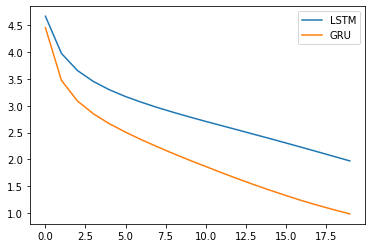

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

loss_lstm = history_lstm.history['loss']
loss_gru = history_gru.history['loss']

plt.plot(np.arange(len(loss_lstm)), loss_lstm, label="LSTM")
plt.plot(np.arange(len(loss_gru)), loss_gru, label="GRU")
plt.legend()
plt.show()